In [13]:
import os

if os.name == 'nt':
    measuring_root = "D:/measuring"
else:
    measuring_root = "/Users/jesse/Thesis/Code"
    
execfile(os.path.join(measuring_root, "analysis/scripts/setup_analysis.py"))
import analysis.lib.purification.purify_delayfb as pu_delayfb;reload(pu_delayfb)
import matplotlib as mpl
mpl.style.use('seaborn-bright')
%matplotlib inline

Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
Setting up analysis environment for Jesse's MacBook
reloaded
Loading config for Jesse's MacBook


reloaded
Loading config for Jesse's MacBook


/Users/jesse/Thesis/Code/analysis/lib/math/error.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uncertainties == None:


ValueError: total size of new array must be unchanged

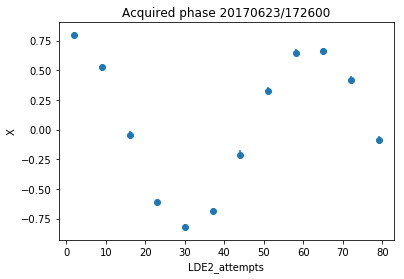

In [2]:
reload(pu_delayfb)

C2_ot = "20170623172000"
C4_ot = "20170623172700"

pu_delayfb.analyse_sequence_phase(contains="phase_fb_delayline", older_than=C4_ot, ret_data=False, 
                                  do_fit=True, fixed=[1],
                                 freq=6./360., decay=100, carbon_idx=1)

In [3]:
reload(pu_delayfb)

#repump_speed_ot = "20170530170400"
repump_speed_ot = None

fr = pu_delayfb.repump_speed(older_than=repump_speed_ot, do_fit=True, show_guess=True, fixed=[], ret=True)

reloaded
Loading config for Jesse's MacBook


IOError: Unable to open file (Unable to open file: name = '/users/jesse/thesis/data/localthesisdata/20170714/135407_ssro_calib_mwinit_111no2_sil2_ssrocalibration_mwinit/analysis.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
reload(pu_delayfb)

fr = pu_delayfb.analyse_sequence_phase(
    contains='phase_offset',
    do_fit = True,
    fixed = [1,4],
    show_guess = True,
    freq = 1./360, 
    decay=np.inf,
    phi0=0.0
)


In [ ]:
reload(pu_delayfb)

fr = pu_delayfb.analyse_sequence_phase(
    contains='phase_fb',
    do_fit = True,
    fixed = [1],
    show_guess = True,
    freq = 8./360, 
    phi0=0.0
)


In [5]:
reload(pu_delayfb)

jitter_test_ot = "20170711160000"

contains = "fb_delayline"

f = pu_delayfb.toolbox.latest_data(contains, older_than=jitter_test_ot)
a = pu_delayfb.PurificationDelayFBPQAnalysis(f)
a.select_dataset('X_positive')

tomo = 'X'
ro_array = ['positive', 'negative']
# print ro_array
if tomo == '':
    adwindata_str = tomo
else:
    adwindata_str = tomo + '_'
x, y, y_u = pu_delayfb.get_pos_neg_data(a, adwindata_str=adwindata_str, ro_array=ro_array, older_than=jitter_test_ot)
ylabel = tomo

a.get_sweep_idxs()
a.extract_pulse_data()

reloaded
Loading config for Jesse's MacBook


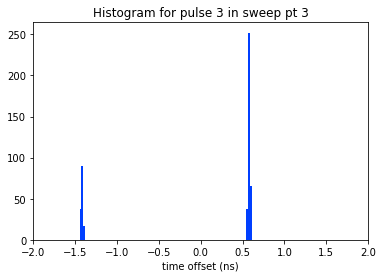

In [104]:
analysis_pulse = 3
analysis_pt = 0

t_data = a.pulse_sync_times[analysis_pulse, analysis_pt, :].flatten()
plt.hist((t_data - np.mean(t_data))/1e3, label="pt %d" % analysis_pt, bins=100)
plt.title("Histogram for pulse %d in sweep pt %d" % (analysis_pulse, analysis_pulse))
plt.xlim(-2, 2)
plt.xlabel("time offset (ns)")
plt.show()

In [7]:
dt_data = np.diff(a.pulse_sync_times, n=1, axis=0)

Average delay: 2688.90 ns, std dev: 0.60 ns
Min delay: 2687.63 ns, max delay: 2690.10 ns
Max - min delay: 2.46 ns


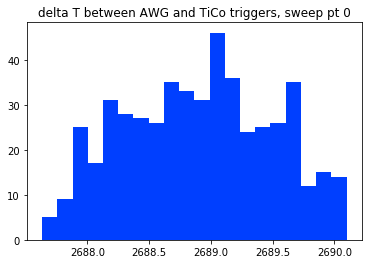

In [86]:
analysis_dt = 3
analysis_pt = 4

for analysis_pt in range(1):

    plt.hist(dt_data[analysis_dt,analysis_pt,:] / 1e3, bins=20)
    plt.title("delta T between AWG and TiCo triggers, sweep pt %d" % analysis_pt)

    avg_delay = np.mean(dt_data[analysis_dt,analysis_pt,:] / 1e3)
    std_delay = np.std(dt_data[analysis_dt,analysis_pt,:] / 1e3)
    min_delay = np.min(dt_data[analysis_dt,analysis_pt,:] / 1e3)
    max_delay = np.max(dt_data[analysis_dt,analysis_pt,:] / 1e3)
    print("Average delay: %.2f ns, std dev: %.2f ns\nMin delay: %.2f ns, max delay: %.2f ns\nMax - min delay: %.2f ns" 
          % (avg_delay, std_delay, min_delay, max_delay, max_delay - min_delay))
    plt.show()

In [ ]:
reload(pu_delayfb)
pu_delayfb.tomo_analysis()

In [ ]:
folder= tb.latest_data('FakeLDE')#, older_than="20170328125814")
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0, 1.0)

In [ ]:
    reload(pu_delayfb)

fr = pu_delayfb.calibrate_LDE_phase(
    contains='phase_fb',
    do_fit = False,
    fixed = [1],
    show_guess = False,
    freq = 8./360, 
    phi0=0.0,
    tomo_basis='Z'
)